## Example: Applying PCA Hand-written classifier

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA


## Getting and showing sample data

Os dados são obtidos em [1], <b>Zip code</b>, cada linha representa uma escala de sinza correpondente a uma imagem de dimensões 16x16, mais informações consulte <b>info</b> na referência.

In [6]:

sampleImgs = pd.read_csv('./data/ZIPcode/zip.train', nrows=40, sep=' ', dtype=np.float, index_col=False, names=np.arange(257)) # 257 = 256 + 1

In [7]:
sampleImgs.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [8]:
scaleGray = sampleImgs.iloc[:,1:]; 
# pegando todas as linhas a partir da segunda coluna,
# observe que a primeira coluna representa o valor do número, label, o restante representa a scala sinza que 
# representa a imagem com o número escrito a mão.

In [9]:
scaleGray = scaleGray.to_numpy(); # transformando em uma matriz numpy

In [10]:

# reajustando as matrizes com a escola sinza para dimensões 16x16, dimensão de cada imagem

newScaleGray = []
for i in range(len(scaleGray)):
    temp = scaleGray[i].reshape(16,16)
    newScaleGray.append(temp)
    

Abaixo é plotado uma amostra com os dados, é mostrado a imagem em escala de sinza com a representação do digito escrito a mão e um índice, em vermelho, com o número que a imagem representa, label.

<Figure size 432x288 with 0 Axes>

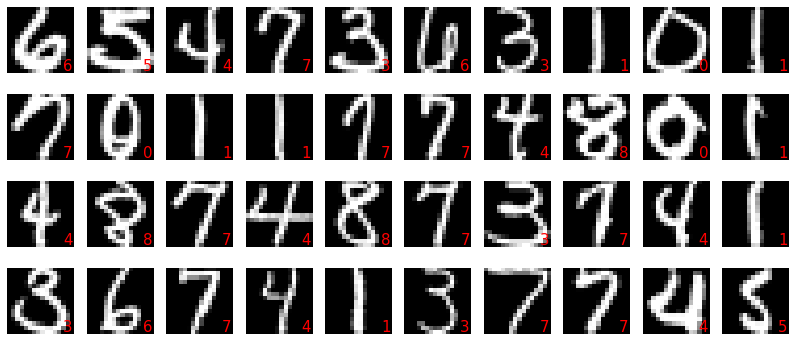

In [11]:

# plotagem

plt.gray()
fig, axe = plt.subplots(4,10, figsize=(14,8))
fig.subplots_adjust(hspace=-0.5)

for a, axe in enumerate(axe.flat):
    axe.imshow(newScaleGray[a])
    axe.text(13,15, int(sampleImgs.iloc[a,0]), color='red', size=15)
    axe.axis('off')

plt.show()

### Working in data

In [12]:

dataTrain = pd.read_csv('./data/ZIPcode/zip.train', sep=' ', dtype=np.float, index_col=False, names=np.arange(257))


In [13]:
dataTrain.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [14]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Columns: 257 entries, 0 to 256
dtypes: float64(257)
memory usage: 14.3 MB


In [15]:

X = dataTrain.iloc[:,1:] # removendo a coluna label, coluna [0]
#XNumpy = X.to_numpy() # transformando o DataFrame em array
X

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,-1.0,-1.0,-1.0,-0.988,-0.527,-0.208,0.620,1.000,0.467,0.396,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7287,-1.0,-1.0,-1.0,-0.990,0.708,0.557,0.347,-0.107,-0.758,-0.975,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7288,-1.0,-1.0,-1.0,-0.783,-0.984,-0.827,0.068,1.000,1.000,1.000,...,0.805,1.000,1.000,0.727,-0.342,-0.933,-1.000,-1.000,-1.000,-1.0
7289,-1.0,-1.0,-1.0,-1.000,-1.000,-0.549,0.463,0.999,0.999,0.999,...,-0.231,0.621,0.999,-0.042,-0.231,-0.687,-1.000,-1.000,-1.000,-1.0


In [16]:

#X.T # transposta de X

Abaixo obtemos a imagem média dos dados, conforme [4] a 

"foto média é simplesmente a 'foto' obtida tirando a média aritmética sobre o conjunto de fotos em cada pixel. Isto é, para um pixel localizado numa certa posição, tiramos a média de todos os valores observados naquela posição nas diferentes fotos do conjunto de treinamento".

In [36]:

# obtendo imagem média, como realizado em [4]

X_mean = []

for a in range(len(X.T)):
    X_mean.append(X.iloc[:,a].mean())

X_mean = np.array(X_mean) # transformando a lista em um array numpy 

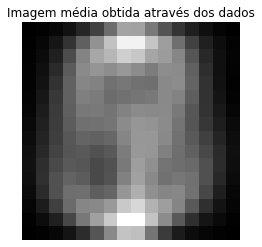

In [18]:

imgMedian = X_mean.reshape(16,16)

plt.gray()
plt.imshow(imgMedian)
plt.title('Imagem média obtida através dos dados')
plt.axis('off')
plt.show()

In [52]:

# centrando quada imagem dos dados, ou seja, reduzindo cada imagem pelo valor da imagem média

imgCenter = []
for a  in range(len(X)):
    imgCenter.append(X.iloc[a,:] - X_mean)
    
imgCenter = np.array(imgCenter);

### Using PCA

In [96]:

K = [5,10,15,20] # número de componetes principais
pcaS = [] # armazena os dados transformados por PCA para cada k
pcaSObject = []

for k in K:
    pca = PCA(n_components=k)
    pcaSObject.append(pca.fit(imgCenter))
    pcaImg = pca.transform(imgCenter)
    pcaS.append(pcaImg)



In [93]:

print('Dimensões dados originais: ', imgCenter.shape, end='\n')
for m, n in enumerate(K):
    print('Dimensões dados após PCA, número de componentes k = {0}: {1}'.format(n,pcaS[m].shape), end='\n')

Dimensões dados originais:  (7291, 256)
Dimensões dados após PCA, número de componentes k = 5: (7291, 5)
Dimensões dados após PCA, número de componentes k = 10: (7291, 10)
Dimensões dados após PCA, número de componentes k = 15: (7291, 15)
Dimensões dados após PCA, número de componentes k = 20: (7291, 20)


Abaixo é mostrado a <b>taxa da variância explicada</b> para cada valor de k.

In [102]:

for m, pcaK in zip(K,pcaSObject):
    cumulativeSum = np.cumsum(pcaK.explained_variance_ratio_)
    print('Cumulative explained variance ratio k = {0}: {1:.3f}'.format(m, cumulativeSum[-1]), end='\n')

Cumulative explained variance ratio k = 5: 0.439
Cumulative explained variance ratio k = 10: 0.591
Cumulative explained variance ratio k = 15: 0.679
Cumulative explained variance ratio k = 20: 0.736


Ou seja, os <b>5 primeiros PCs explicam, aproximadamente, 44% da variância total</b> dos dados, enquanto que os <b>20 primeiros explicam em torno de 73% da variância total</b>.

<Figure size 432x288 with 0 Axes>

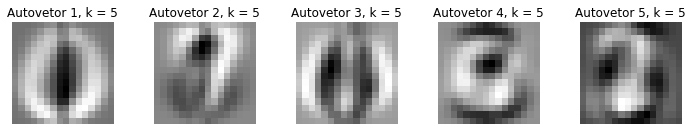

In [130]:

# Autovetores resized 16x16 para k = 5, 

plt.gray()
fig, axe = plt.subplots(1,5, figsize=(12,8))
fig.subplots_adjust(wspace=0.4)

for a, axe in enumerate(axe.flat):
    axe.imshow(pcaSObject[0].components_[a].reshape(16,16)) # k = 5
    axe.axis('off')
    axe.set_title('Autovetor {0}, k = {1}'.format(a+1, 5))

plt.show()

A variância explicada e a taxa da variação explicada, k = 5, para cada autovetor é obtida por:

In [135]:

# A variância explicada por cada autovetor é obtida por:
pcaSObject[0].explained_variance_


array([21.62126453, 10.84064856,  7.9448491 ,  6.71513492,  5.94097872])

In [137]:
pcaSObject[0].explained_variance_ratio_

array([0.17884424, 0.0896704 , 0.06571727, 0.05554546, 0.04914189])

<Figure size 432x288 with 0 Axes>

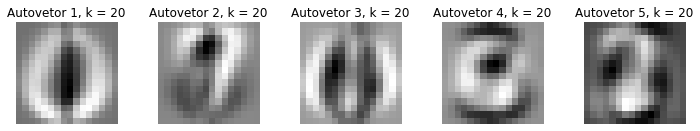

In [131]:

# Autovetores resized 16x16 para k = 20, 

plt.gray()
fig, axe = plt.subplots(1,5, figsize=(12,8))
fig.subplots_adjust(wspace=0.4)

for a, axe in enumerate(axe.flat):
    axe.imshow(pcaSObject[-1].components_[a].reshape(16,16)) # k = 20
    axe.axis('off')
    axe.set_title('Autovetor {0}, k = {1}'.format(a+1, 20))

plt.show()

In [136]:

# A variância explicada por cada autovetor é obtida por:
pcaSObject[-1].explained_variance_

array([21.62126453, 10.84064856,  7.9448491 ,  6.71513493,  5.94097876,
        4.65675818,  3.95452283,  3.71270172,  3.10314461,  2.94583765,
        2.63249271,  2.44301701,  2.05957349,  1.77607507,  1.71213036,
        1.56930609,  1.48089785,  1.39295304,  1.28262111,  1.2030456 ])

### Using sample data test

In [138]:

sampleTest = pd.read_csv('./data/ZIPcode/zip.test', nrows=1, sep=' ', dtype=np.float, index_col=False, names=np.arange(257)) # 257 = 256 + 1


In [140]:
sampleTest.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.948,-0.561,0.148,0.384,...,-1.0,-0.908,0.43,0.622,-0.973,-1.0,-1.0,-1.0,-1.0,-1.0


In [143]:
scaleGrayTest = sampleTest.iloc[:,1:]; 
scaleGrayTest = scaleGrayTest.to_numpy()

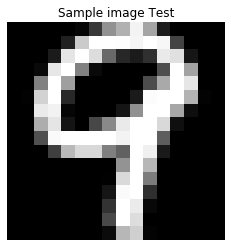

In [145]:

plt.gray()
plt.imshow(scaleGrayTest.reshape(16,16))
plt.axis('off')
plt.title('Sample image Test')
plt.show()

In [153]:

coef = [] # Obtendo os coeficientes para k = 20
for i in range(20):
    coef.append(np.inner(pcaSObject[-1].components_[i].T,(scaleGrayTest - X_mean))) # k = 20


### Não finalizado a partir daqui

In [121]:
#help(PCA)

### References

[1]https://web.stanford.edu/~hastie/ElemStatLearn//
<br>
[2]https://web.stanford.edu/~hastie/ElemStatLearn//
<br>
[3]https://stackoverflow.com/questions/7694772/turning-a-large-matrix-into-a-grayscale-image
<br>
[4]https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/FECD.pdf
Cap. Análise de componentes principais e fatorial
<br>
[5]https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
<br>
[6]http://professor.ufabc.edu.br/~ronaldo.prati/DataMining/PCA.pdf
<br>
[7]https://www.youtube.com/watch?v=_UVHneBUBW0
<br>